In [ ]:
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use('ggplot')
%matplotlib inline

import os

In [2]:
from sklearn.cluster import KMeans

In [3]:
# Разрешаем доступ к гугл диску, в котором находится файл с данными
from google.colab import drive
drive.mount('/content/gdrive/')

Mounted at /content/gdrive/


In [4]:
#  Импортируем файл с данными и выводим первые 10 строк
candy = pd.read_csv('gdrive/MyDrive/Python/lab_1/Data.dat', sep=";", header = 0, index_col=False)
candy.head(10)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11
0,4,5,5,5,3,3,3,3,3,3,3
1,5,4,5,5,3,3,3,3,3,3,3
2,5,5,4,5,3,3,3,3,3,3,3
3,5,4,5,5,3,3,3,3,3,3,3
4,4,5,5,5,3,3,3,3,3,3,3
5,5,4,5,5,3,3,3,3,3,3,3
6,5,5,4,5,3,3,3,3,3,3,3
7,5,4,5,5,3,3,3,3,3,3,3
8,5,5,5,5,3,3,3,3,3,3,3
9,5,4,5,4,3,3,3,3,3,3,3


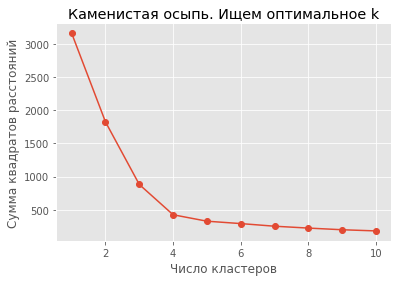

In [6]:
# Определяем количество кластеров, проводя кластеризацию с количеством кластеров от 1 до 11 и подсчитывая качетсво модели W
K = range(1, 11)
models = [KMeans(n_clusters=k, random_state=42, n_init=10, verbose=0).fit(candy) for k in K]
dist = [model.inertia_ for model in models]

# Строим график каменистая осыпь
plt.plot(K, dist, marker='o')
plt.xlabel('Число кластеров')
plt.ylabel('Сумма квадратов расстояний')
plt.title('Каменистая осыпь. Ищем оптимальное k')
plt.show()

Похоже на то, что число кластеров 4 

Строим окончательную модель для 4 кластеров

In [9]:
model = KMeans(n_clusters=4, random_state=42, max_iter=300, n_init=10, verbose=0)
model.fit(candy)
candy['cluster'] = model.labels_
candy.groupby('cluster').mean()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11
cluster,,,,,,,,,,,
0,4.845455,4.800000,4.836364,4.681818,3.036364,3.036364,3.000000,2.990909,3.072727,3.045455,3.045455
1,2.824074,2.833333,2.768519,2.620370,2.611111,2.583333,2.750000,2.916667,4.953704,4.814815,4.861111
2,3.000000,2.966102,2.966102,2.915254,2.915254,2.949153,4.915254,4.915254,3.000000,3.000000,3.000000
3,3.000000,3.000000,3.000000,3.000000,4.852459,4.852459,3.000000,2.918033,2.754098,2.754098,2.754098


In [10]:
print(candy)

     V1  V2  V3  V4  V5  V6  V7  V8  V9  V10  V11  cluster
0     4   5   5   5   3   3   3   3   3    3    3        0
1     5   4   5   5   3   3   3   3   3    3    3        0
2     5   5   4   5   3   3   3   3   3    3    3        0
3     5   4   5   5   3   3   3   3   3    3    3        0
4     4   5   5   5   3   3   3   3   3    3    3        0
..   ..  ..  ..  ..  ..  ..  ..  ..  ..  ...  ...      ...
333   3   3   3   3   3   3   5   5   3    3    3        2
334   3   3   3   3   3   3   5   5   3    3    3        2
335   3   3   3   3   3   3   5   5   3    3    3        2
336   3   3   3   3   3   3   5   5   3    3    3        2
337   3   3   3   3   3   3   5   5   3    3    3        2

[338 rows x 12 columns]


In [11]:
candy.groupby('cluster').size()

cluster
0    110
1    108
2     59
3     61
dtype: int64